<a href="https://colab.research.google.com/github/Rinaldrago05/Data_Science_Learning/blob/main/Intermediate_Machine_Learning_Ishan.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Missing Values**

In real world datasets there will be many occurences where we will have to deal with missing values.

## **Introduction**

There are many ways data can end up with missing values. For example,



*   A 2 bedroom house won't include a value for the size of a third bedroom.
*  A survey respondent may choose not to share his income.



## **Three Approaches**

Below, we have discussed three methods to deal with missing values, namely


1.   **Dropping Columns**
2.   **Imputation**
3.   **An Extension to Imputation**

In [107]:
# Importing pandas and train_test_split function.

import pandas as pd
from sklearn.model_selection import train_test_split

In [108]:
# Reading the data into a variable.

data=pd.read_csv("/content/drive/MyDrive/Colab Notebooks/Intermediate_Machine_Learning/melb_data.csv")

In [109]:
# Checking if the data is loaded properly by printing the first few lines from the dataframe.

data.head()

,Suburb,Address,Rooms,Type,Price,Method,SellerG,Date,Distance,Postcode,Bedroom2,Bathroom,Car,Landsize,BuildingArea,YearBuilt,CouncilArea,Lattitude,Longtitude,Regionname,Propertycount
0,Abbotsford,85 Turner St,2,h,1480000.0,S,Biggin,3/12/2016,2.5,3067.0,2.0,1.0,1.0,202.0,NaN,NaN,Yarra,-37.7996,144.9984,Northern Metropolitan,4019.0
1,Abbotsford,25 Bloomburg St,2,h,1035000.0,S,Biggin,4/02/2016,2.5,3067.0,2.0,1.0,0.0,156.0,79.0,1900.0,Yarra,-37.8079,144.9934,Northern Metropolitan,4019.0
2,Abbotsford,5 Charles St,3,h,1465000.0,SP,Biggin,4/03/2017,2.5,3067.0,3.0,2.0,0.0,134.0,150.0,1900.0,Yarra,-37.8093,144.9944,Northern Metropolitan,4019.0
3,Abbotsford,40 Federation La,3,h,850000.0,PI,Biggin,4/03/2017,2.5,3067.0,3.0,2.0,1.0,94.0,NaN,NaN,Yarra,-37.7969,144.9969,Northern Metropolitan,4019.0
4,Abbotsford,55a Park St,4,h,1600000.0,VB,Nelson,4/06/2016,2.5,3067.0,3.0,1.0,2.0,120.0,142.0,2014.0,Yarra,-37.8072,144.9941,Northern Metropolitan,4019.0


In [110]:
# Creating the target variable.

y=data.Price
y

0        1480000.0
1        1035000.0
2        1465000.0
3         850000.0
4        1600000.0
           ...    
13575    1245000.0
13576    1031000.0
13577    1170000.0
13578    2500000.0
13579    1285000.0
Name: Price, Length: 13580, dtype: float64

In [111]:
# The drop() function is used to remove rows or columns from a dataframe.
# Here, it is used to completely drop the Price column from the dataframe and stored to create the X variable for prediction later.

melb_predictors=data.drop(['Price'],axis=1)
melb_predictors

,Suburb,Address,Rooms,Type,Method,SellerG,Date,Distance,Postcode,Bedroom2,Bathroom,Car,Landsize,BuildingArea,YearBuilt,CouncilArea,Lattitude,Longtitude,Regionname,Propertycount
0,Abbotsford,85 Turner St,2,h,S,Biggin,3/12/2016,2.5,3067.0,2.0,1.0,1.0,202.0,NaN,NaN,Yarra,-37.79960,144.99840,Northern Metropolitan,4019.0
1,Abbotsford,25 Bloomburg St,2,h,S,Biggin,4/02/2016,2.5,3067.0,2.0,1.0,0.0,156.0,79.0,1900.0,Yarra,-37.80790,144.99340,Northern Metropolitan,4019.0
2,Abbotsford,5 Charles St,3,h,SP,Biggin,4/03/2017,2.5,3067.0,3.0,2.0,0.0,134.0,150.0,1900.0,Yarra,-37.80930,144.99440,Northern Metropolitan,4019.0
3,Abbotsford,40 Federation La,3,h,PI,Biggin,4/03/2017,2.5,3067.0,3.0,2.0,1.0,94.0,NaN,NaN,Yarra,-37.79690,144.99690,Northern Metropolitan,4019.0
4,Abbotsford,55a Park St,4,h,VB,Nelson,4/06/2016,2.5,3067.0,3.0,1.0,2.0,120.0,142.0,2014.0,Yarra,-37.80720,144.99410,Northern Metropolitan,4019.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13575,Wheelers Hill,12 Strada Cr,4,h,S,Barry,26/08/2017,16.7,3150.0,4.0,2.0,2.0,652.0,NaN,1981.0,NaN,-37.90562,145.16761,South-Eastern Metropolitan,7392.0
13576,Williamstown,77 Merrett Dr,3,h,SP,Williams,26/08/2017,6.8,3016.0,3.0,2.0,2.0,333.0,133.0,1995.0,NaN,-37.85927,144.87904,Western Metropolitan,6380.0
13577,Williamstown,83 Power St,3,h,S,Raine,26/08/2017,6.8,3016.0,3.0,2.0,4.0,436.0,NaN,1997.0,NaN,-37.85274,144.88738,Western Metropolitan,6380.0
13578,Williamstown,96 Verdon St,4,h,PI,Sweeney,26/08/2017,6.8,3016.0,4.0,1.0,5.0,866.0,157.0,1920.0,NaN,-37.85908,144.89299,Western Metropolitan,6380.0


In [112]:
# The select_dtypes() function is used to return a subset of the dataframe based on the column dtypes or column datatypes.
# Here, it is used to exclude and return a dataframe without any columns of dtype object, i.e. string in this case.

X=melb_predictors.select_dtypes(exclude=['object'])
X

,Rooms,Distance,Postcode,Bedroom2,Bathroom,Car,Landsize,BuildingArea,YearBuilt,Lattitude,Longtitude,Propertycount
0,2,2.5,3067.0,2.0,1.0,1.0,202.0,NaN,NaN,-37.79960,144.99840,4019.0
1,2,2.5,3067.0,2.0,1.0,0.0,156.0,79.0,1900.0,-37.80790,144.99340,4019.0
2,3,2.5,3067.0,3.0,2.0,0.0,134.0,150.0,1900.0,-37.80930,144.99440,4019.0
3,3,2.5,3067.0,3.0,2.0,1.0,94.0,NaN,NaN,-37.79690,144.99690,4019.0
4,4,2.5,3067.0,3.0,1.0,2.0,120.0,142.0,2014.0,-37.80720,144.99410,4019.0
...,...,...,...,...,...,...,...,...,...,...,...,...
13575,4,16.7,3150.0,4.0,2.0,2.0,652.0,NaN,1981.0,-37.90562,145.16761,7392.0
13576,3,6.8,3016.0,3.0,2.0,2.0,333.0,133.0,1995.0,-37.85927,144.87904,6380.0
13577,3,6.8,3016.0,3.0,2.0,4.0,436.0,NaN,1997.0,-37.85274,144.88738,6380.0
13578,4,6.8,3016.0,4.0,1.0,5.0,866.0,157.0,1920.0,-37.85908,144.89299,6380.0


In [113]:
# Dividing the dataset for training data and validating data.
# The train size is to mention the proportion of the data to be taken as training dataset.
# The test size is to mention the proportion of the data to be taken as testing dataset.
# The value if given between 0 to 1, gives the fractional proportion of data and the two sizes should be complement of each other.

X_train,X_valid,y_train,y_valid=train_test_split(X,y,train_size=0.8,test_size=0.2,random_state=0)

In [114]:
# Importing the Random Forest Regressor and Mean Absolute Error.

from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error

In [115]:
# The n_estimators paramter is used to set the number of trees in the forest.
# This function takes the training and validating dataset and then makes a model, fits it and predicts the values for target variable,
# and then calculates the error between actual and predicted data and returns it.

def score_dataset(X_train,X_valid,y_train,y_valid,no):
  model=RandomForestRegressor(n_estimators=no,random_state=0)
  model.fit(X_train,y_train)
  preds=model.predict(X_valid)
  return mean_absolute_error(y_valid,preds)

#### **1) Dropping Columns**

The simplest option is to just simply drop the columns which got missing values in any rows. But the problem is that if that column contains any useful information to train highly accurate model, then it is not a great idea. If it is not the case, then it can be.

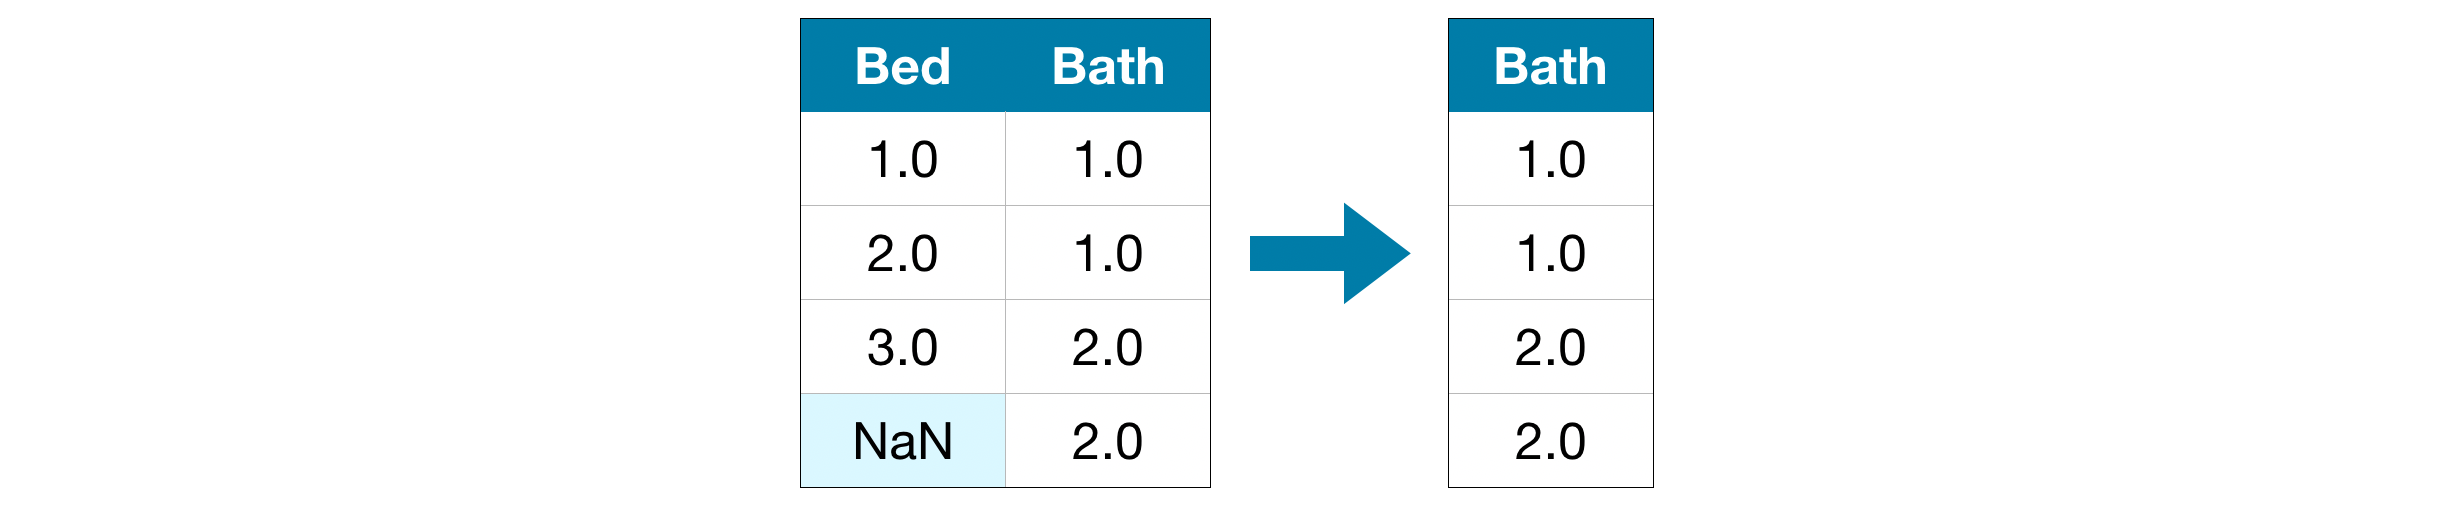

In [116]:
# Here, we try to find which values are null, in the datframe. If a particular value is null, then return true, otherwise false.

X_train[X_train.columns].isnull()

,Rooms,Distance,Postcode,Bedroom2,Bathroom,Car,Landsize,BuildingArea,YearBuilt,Lattitude,Longtitude,Propertycount
12167,False,False,False,False,False,False,False,True,False,False,False,False
6524,False,False,False,False,False,False,False,True,True,False,False,False
8413,False,False,False,False,False,False,False,True,True,False,False,False
2919,False,False,False,False,False,False,False,True,False,False,False,False
6043,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...
13123,False,False,False,False,False,False,False,True,True,False,False,False
3264,False,False,False,False,False,False,False,False,False,False,False,False
9845,False,False,False,False,False,False,False,False,False,False,False,False
10799,False,False,False,False,False,False,False,True,True,False,False,False


In [117]:
# Here, the any() function function returns true for a particular column, if that column contains any one value which is true in X_train[X_train.columns].isnull(), otherwise false.
# So, hence we get the columns which have atleast one value null in it, which is represented by true.

X_train[X_train.columns].isnull().any()

Rooms            False
Distance         False
Postcode         False
Bedroom2         False
Bathroom         False
Car               True
Landsize         False
BuildingArea      True
YearBuilt         True
Lattitude        False
Longtitude       False
Propertycount    False
dtype: bool

In [118]:
# We try to store those column names in the below variable which has atleast one value null under it.

cols_with_missing=[col for col in X_train.columns if X_train[col].isnull().any()]
cols_with_missing

['Car', 'BuildingArea', 'YearBuilt']

In [119]:
# For both X_train and X_valid we drop all those columns with atleast one null values under it.

reduced_X_train=X_train.drop(cols_with_missing,axis=1)
reduced_X_valid=X_valid.drop(cols_with_missing,axis=1)

In [120]:
# We here print the error from the first approach.

print("MAE from Appraoch 1 (Drop columns with missing values):")
print(score_dataset(reduced_X_train,reduced_X_valid,y_train,y_valid,10))

MAE from Appraoch 1 (Drop columns with missing values):
183550.22137772635


#### **2) Imputation**

Imputation is bascially the process of filling the missing values with some number or text, depending on the data type of the column we are dealing with.

For instance, we can fill the missing value with mean, median, most frquent value or even a particular value for numeric datatypes and most frequent or some specific text for object datatypes.

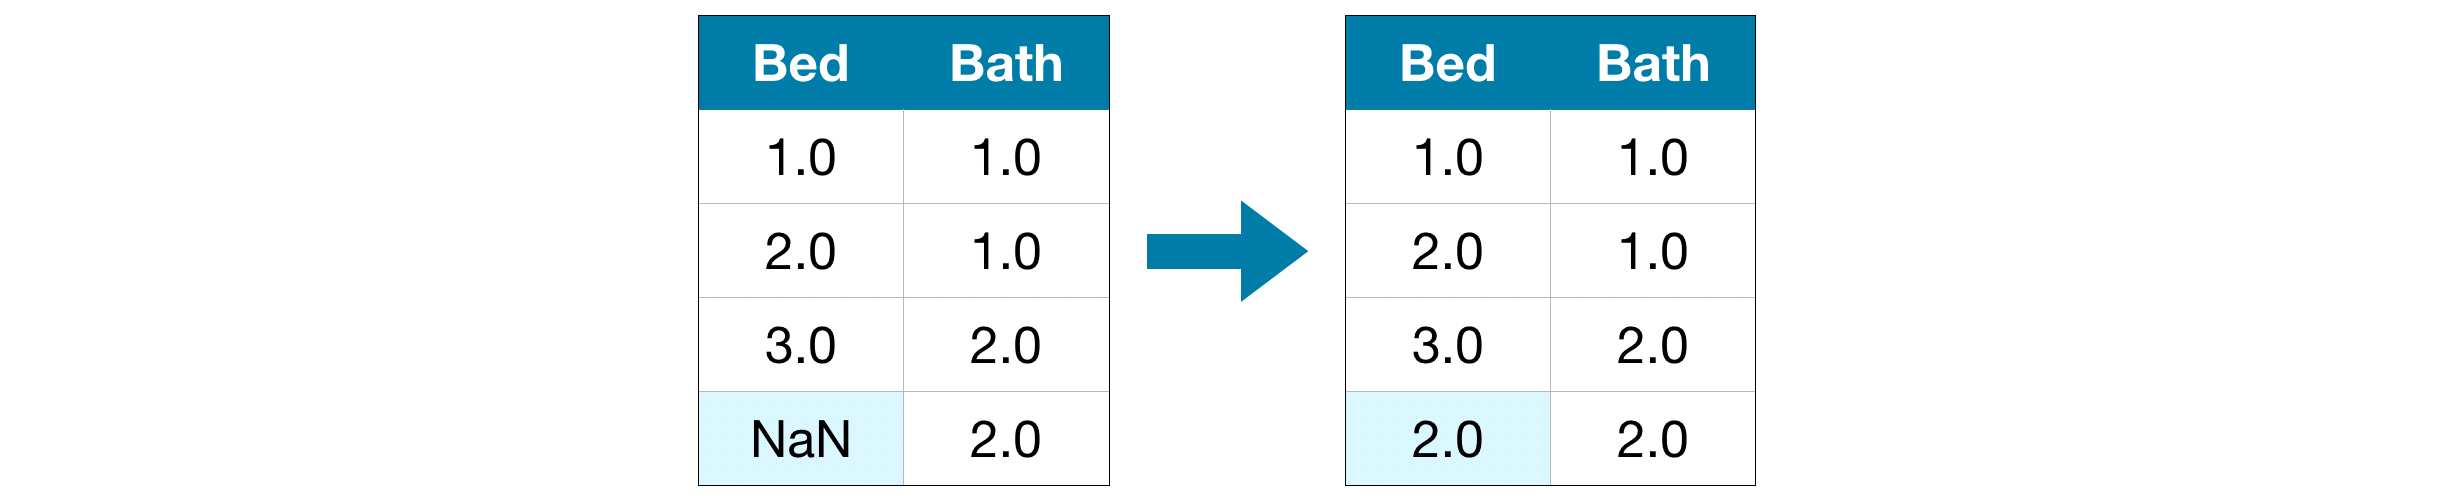

The imputed value won't be exactly right in most cases, but it usually leads to more accurate models than you would get from dropping the column entirely.

There are more complex ways to determine the imputed values, for example, **regression imputation**.

In [121]:
# Importing the Simple Imputer class.

from sklearn.impute import SimpleImputer

In [122]:
# We declare the SimpleImputer under a variable.

my_imputer=SimpleImputer()

In [123]:
# Here, the SimpleImputer() imputes the missing values in the training dataset.

my_imputer.fit_transform(X_train)

array([[ 1.0000000e+00,  5.0000000e+00,  3.1820000e+03, ...,
        -3.7859840e+01,  1.4498670e+02,  1.3240000e+04],
       [ 2.0000000e+00,  8.0000000e+00,  3.0160000e+03, ...,
        -3.7858000e+01,  1.4490050e+02,  6.3800000e+03],
       [ 3.0000000e+00,  1.2600000e+01,  3.0200000e+03, ...,
        -3.7798800e+01,  1.4482200e+02,  3.7550000e+03],
       ...,
       [ 4.0000000e+00,  6.7000000e+00,  3.0580000e+03, ...,
        -3.7735720e+01,  1.4497256e+02,  1.1204000e+04],
       [ 3.0000000e+00,  1.2000000e+01,  3.0730000e+03, ...,
        -3.7720570e+01,  1.4502615e+02,  2.1650000e+04],
       [ 4.0000000e+00,  6.4000000e+00,  3.0110000e+03, ...,
        -3.7794300e+01,  1.4488750e+02,  7.5700000e+03]])

In [124]:
# Here, the SimpleIMputer() imputed the missing values in the validating dataset.

my_imputer.transform(X_valid)

array([[ 4.0000000e+00,  8.0000000e+00,  3.0160000e+03, ...,
        -3.7861000e+01,  1.4489850e+02,  6.3800000e+03],
       [ 2.0000000e+00,  6.6000000e+00,  3.0110000e+03, ...,
        -3.7810000e+01,  1.4488960e+02,  2.4170000e+03],
       [ 3.0000000e+00,  1.0500000e+01,  3.0200000e+03, ...,
        -3.7767400e+01,  1.4482421e+02,  4.2170000e+03],
       ...,
       [ 3.0000000e+00,  1.0800000e+01,  3.1050000e+03, ...,
        -3.7780940e+01,  1.4510131e+02,  4.4800000e+03],
       [ 4.0000000e+00,  6.2000000e+00,  3.0390000e+03, ...,
        -3.7764210e+01,  1.4490571e+02,  6.2320000e+03],
       [ 2.0000000e+00,  1.6000000e+00,  3.0660000e+03, ...,
        -3.7796200e+01,  1.4498870e+02,  4.5530000e+03]])

In [125]:
# We simply make call the fit_transfrom() function on the training dataset and transfrom() function on the validing dataset.
# Both of the functions return an numpy array. So , we change and store them in two different dataframes.
# Since, we pass the whole dataframe in the imputer function it returns an array of size of the dataframe with all values as it is, along with the new imputed values.
# So, our new dataframe which will be used to train will be imputed_X_train and for validating will be imputed_X_valid.
# We can also pass only the columns with missing values and store them in the X_train dataframe itself.
# X_train[cols_with_missing]=my_imputer.fit_transform(X_train[cols_with_missing])
# This way the original dataframe column names will also not be lost.

imputed_X_train=pd.DataFrame(my_imputer.fit_transform(X_train))
imputed_X_valid=pd.DataFrame(my_imputer.transform(X_valid))

In [126]:
# After using the imputer, we successfully impute the missing values, but since a new array is created all together which is then converted into a dataframe,
# we loose our column names when compared to the original dataframe.

imputed_X_train

,0,1,2,3,4,5,6,7,8,9,10,11
0,1.0,5.0,3182.0,1.0,1.0,1.0,0.0,153.764119,1940.000000,-37.85984,144.98670,13240.0
1,2.0,8.0,3016.0,2.0,2.0,1.0,193.0,153.764119,1964.839866,-37.85800,144.90050,6380.0
2,3.0,12.6,3020.0,3.0,1.0,1.0,555.0,153.764119,1964.839866,-37.79880,144.82200,3755.0
3,3.0,13.0,3046.0,3.0,1.0,1.0,265.0,153.764119,1995.000000,-37.70830,144.91580,8870.0
4,3.0,13.3,3020.0,3.0,1.0,2.0,673.0,673.000000,1970.000000,-37.76230,144.82720,4217.0
...,...,...,...,...,...,...,...,...,...,...,...,...
10859,3.0,5.2,3056.0,3.0,1.0,2.0,212.0,153.764119,1964.839866,-37.77695,144.95785,11918.0
10860,3.0,10.5,3081.0,3.0,1.0,1.0,748.0,101.000000,1950.000000,-37.74160,145.04810,2947.0
10861,4.0,6.7,3058.0,4.0,2.0,2.0,441.0,255.000000,2002.000000,-37.73572,144.97256,11204.0
10862,3.0,12.0,3073.0,3.0,1.0,1.0,606.0,153.764119,1964.839866,-37.72057,145.02615,21650.0


In [127]:
# Same case as above, we loose the column names in this dataframe too.

imputed_X_valid

,0,1,2,3,4,5,6,7,8,9,10,11
0,4.0,8.0,3016.0,4.0,2.0,2.0,450.0,190.000000,1910.000000,-37.86100,144.89850,6380.0
1,2.0,6.6,3011.0,2.0,1.0,0.0,172.0,81.000000,1900.000000,-37.81000,144.88960,2417.0
2,3.0,10.5,3020.0,3.0,1.0,1.0,581.0,153.764119,1964.839866,-37.76740,144.82421,4217.0
3,3.0,4.5,3181.0,2.0,2.0,1.0,128.0,134.000000,2000.000000,-37.85260,145.00710,7717.0
4,3.0,8.5,3044.0,3.0,2.0,2.0,480.0,153.764119,1964.839866,-37.72523,144.94567,7485.0
...,...,...,...,...,...,...,...,...,...,...,...,...
2711,2.0,6.4,3011.0,2.0,1.0,1.0,47.0,35.000000,2013.000000,-37.80140,144.89590,7570.0
2712,4.0,8.0,3016.0,4.0,2.0,4.0,551.0,153.764119,1964.839866,-37.85790,144.87860,6380.0
2713,3.0,10.8,3105.0,3.0,1.0,1.0,757.0,153.764119,1964.839866,-37.78094,145.10131,4480.0
2714,4.0,6.2,3039.0,4.0,1.0,3.0,478.0,152.000000,1925.000000,-37.76421,144.90571,6232.0


In [128]:
# Due to loosing the column names, we thus give all the columns their respective names based on original dataframes.

imputed_X_train.columns=X_train.columns
imputed_X_valid.columns=X_valid.columns

In [129]:
# We here print the error from the second approach.

print("MAE from Approach 2 (Imputation):")
print(score_dataset(imputed_X_train, imputed_X_valid, y_train, y_valid,10))

MAE from Approach 2 (Imputation):
178166.46269899711


#### **3) An extension to the Imputation process.**

Imputation in the standard approach usually works well. However, imputed values may be systematically above or below their actual values. Or rows with missing values may be unique in some other way. In that case, your model would make better predictions by considering which values were originally missing.

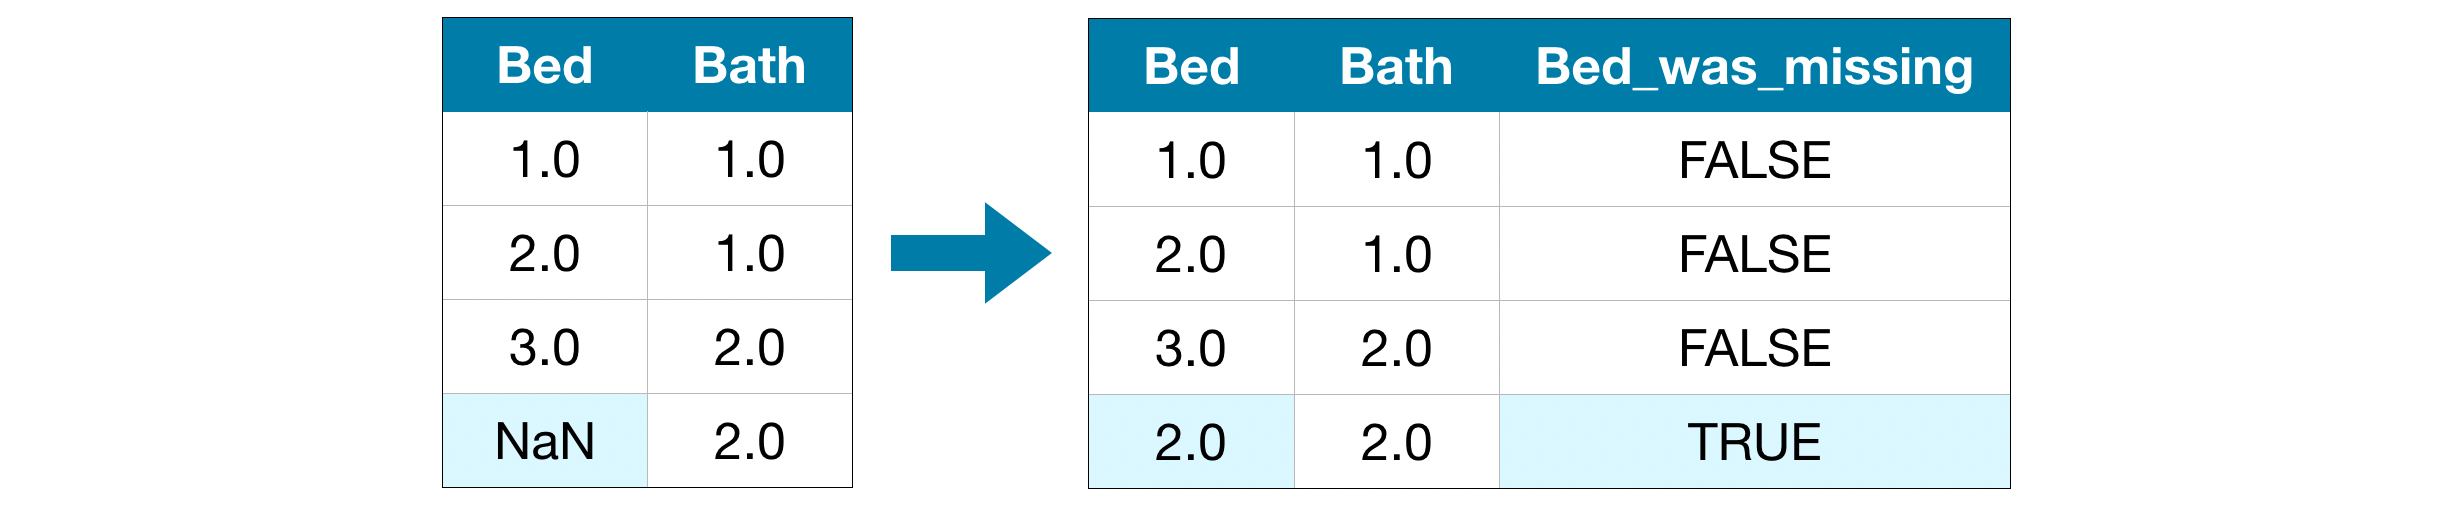

In this approach, we impute the missing values, as before. And, additionally, for each column with missing entries in the original dataset, we add a new column that shows the location of the imputed entries.

In some cases, this will meaningfully improve results. In other cases, it doesn't help at all.

In [130]:
# Making copies of both the dataframes to avoid any change in the original data.

X_train_plus=X_train.copy()
X_valid_plus=X_valid.copy()

In [131]:
# Here, we add new columns in those copy of the dataframes for training and validating data required for the third approach.
# We run a for loop for all those columns with atleast one missing value. We add a new column for each of those columns in both the dataset.
# The new column will contain true, if the respective value under the normal column is null and false, if it is not null.

for col in cols_with_missing:
  X_train_plus[col+'_was_missing']=X_train_plus[col].isnull()
  X_valid_plus[col+'_was_missing']=X_valid_plus[col].isnull()

In [132]:
# Doing the imputation of the new dataframe.

my_imputer=SimpleImputer()
imputed_X_train_plus=pd.DataFrame(my_imputer.fit_transform(X_train_plus))
imputed_X_valid_plus=pd.DataFrame(my_imputer.transform(X_valid_plus))

In [133]:
# We here print the error from the third approach.

print("MAE from Approach 3 (An Extension to Imputation):")
print(score_dataset(imputed_X_train_plus, imputed_X_valid_plus, y_train, y_valid,10))

MAE from Approach 3 (An Extension to Imputation):
178927.503183954


#### **So, why did imputation performed better than dropping the columns?**

The training data has 10864 rows and 12 columns, where three columns contain missing data. For each column, less than half of the entries are missing. Thus, dropping the columns removes a lot of useful information, and so it makes sense that imputation performed better.

In [134]:
# Prints the number of rows and columns of the given dataframe.
print(X_train.shape)

# Finding and printing those columns which has got null values under it and also printing the total number of null values under that column.
missing_val_count_by_column = (X_train.isnull().sum())
print(missing_val_count_by_column[missing_val_count_by_column > 0])

(10864, 12)
Car               49
BuildingArea    5156
YearBuilt       4307
dtype: int64


# **Categorical Variables**

Below we will learn how to deal categorical variables. In total three processes are discussed below.

## **Introduction**

A categorical varaible takes only a limited number of values.

For example, if we consider a survey, where we have to rate the food quality. We can either give, excellent, good, great, average, not good, worst. Then the rating column in the dataset will be a categorical variable.

We will get an error if you try to plug these variables into most machine learning models in Python without preprocessing them first.

## **Three Approaches**

There are in total three apporaches that's been discussed below to deal with this variables, namely
1.   **Dropping Columns**
2.   **Ordinal Encoder**
3.   **One-Hot Encoding**

In [135]:
# Reading the same dataset in a new variable data_1.

data_1=pd.read_csv("/content/drive/MyDrive/Colab Notebooks/Intermediate_Machine_Learning/melb_data.csv")

In [136]:
# Creating two variables y_1 and X_1, where, y_1 contains the price column of the dataset and X_1 contains all the other columns except price column.

y_1=data_1.Price
X_1=data_1.drop(['Price'],axis=1)

In [137]:
# Dividing the data into 4 parts containg two pairs.
# One pair is for training data having the X and y part as X_train_full and y_train_full respectively.
# Another pair is for validating data having the X and y part as X_valid_full and y_valid_full respectively.

X_train_full,X_valid_full,y_train_full,y_valid_full=train_test_split(X_1,y_1,train_size=0.8,test_size=0.2,random_state=0)

In [138]:
# Dropping all the columns from the training and validating dataframe, which got atleast one value as null under it.
# We update the same dataframe itself, i.e. we donot return a new dataframe.
# To update the older dataframe itself, we use the parameter inplace and give the value True in it.

X_train_full.drop(cols_with_missing,axis=1,inplace=True)
X_valid_full.drop(cols_with_missing,axis=1,inplace=True)

/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:4174: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [139]:
# Printing the training dataframe after droping columns.

X_train_full

,Suburb,Address,Rooms,Type,Method,SellerG,Date,Distance,Postcode,Bedroom2,Bathroom,Landsize,CouncilArea,Lattitude,Longtitude,Regionname,Propertycount
12167,St Kilda,11/22 Charnwood Cr,1,u,S,hockingstuart,29/07/2017,5.0,3182.0,1.0,1.0,0.0,Port Phillip,-37.85984,144.98670,Southern Metropolitan,13240.0
6524,Williamstown,18 James St,2,h,SA,Hunter,17/09/2016,8.0,3016.0,2.0,2.0,193.0,Hobsons Bay,-37.85800,144.90050,Western Metropolitan,6380.0
8413,Sunshine,10 Dundalk St,3,h,S,Barry,8/04/2017,12.6,3020.0,3.0,1.0,555.0,Brimbank,-37.79880,144.82200,Western Metropolitan,3755.0
2919,Glenroy,1/2 Prospect St,3,u,SP,Brad,18/06/2016,13.0,3046.0,3.0,1.0,265.0,Moreland,-37.70830,144.91580,Northern Metropolitan,8870.0
6043,Sunshine North,35 Furlong Rd,3,h,S,First,22/05/2016,13.3,3020.0,3.0,1.0,673.0,Brimbank,-37.76230,144.82720,Western Metropolitan,4217.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13123,Brunswick,232 Brunswick Rd,3,h,SP,Chambers,23/09/2017,5.2,3056.0,3.0,1.0,212.0,NaN,-37.77695,144.95785,Northern Metropolitan,11918.0
3264,Heidelberg Heights,484 Waterdale Rd,3,h,S,Miles,25/02/2017,10.5,3081.0,3.0,1.0,748.0,Banyule,-37.74160,145.04810,Eastern Metropolitan,2947.0
9845,Coburg,17 Quarry Cct,4,h,PI,Ray,24/06/2017,6.7,3058.0,4.0,2.0,441.0,Moreland,-37.73572,144.97256,Northern Metropolitan,11204.0
10799,Reservoir,2 Kerang Av,3,h,S,Love,8/07/2017,12.0,3073.0,3.0,1.0,606.0,Darebin,-37.72057,145.02615,Northern Metropolitan,21650.0


In [140]:
# Printing the validating dataframe after droping columns.

X_valid_full

,Suburb,Address,Rooms,Type,Method,SellerG,Date,Distance,Postcode,Bedroom2,Bathroom,Landsize,CouncilArea,Lattitude,Longtitude,Regionname,Propertycount
8505,Williamstown,44 Electra St,4,h,SP,Greg,6/05/2017,8.0,3016.0,4.0,2.0,450.0,Hobsons Bay,-37.86100,144.89850,Western Metropolitan,6380.0
5523,Seddon,80 Gamon St,2,h,S,Chisholm,30/07/2016,6.6,3011.0,2.0,1.0,172.0,Maribyrnong,-37.81000,144.88960,Western Metropolitan,2417.0
12852,Sunshine North,6 Melton Av,3,h,SP,Sweeney,16/09/2017,10.5,3020.0,3.0,1.0,581.0,NaN,-37.76740,144.82421,Western Metropolitan,4217.0
4818,Prahran,16 Park Rd,3,t,PI,Marshall,6/08/2016,4.5,3181.0,2.0,2.0,128.0,Stonnington,-37.85260,145.00710,Southern Metropolitan,7717.0
12812,Pascoe Vale,13 Yorkshire St,3,h,S,Nelson,16/09/2017,8.5,3044.0,3.0,2.0,480.0,NaN,-37.72523,144.94567,Northern Metropolitan,7485.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2664,Footscray,1/30 Pickett St,2,u,PI,Burnham,4/03/2017,6.4,3011.0,2.0,1.0,47.0,Maribyrnong,-37.80140,144.89590,Western Metropolitan,7570.0
8513,Williamstown,60 Merrett Dr,4,h,SP,Williams,13/05/2017,8.0,3016.0,4.0,2.0,551.0,Hobsons Bay,-37.85790,144.87860,Western Metropolitan,6380.0
12922,Bulleen,5 Amberley Ct,3,h,S,Barry,19/08/2017,10.8,3105.0,3.0,1.0,757.0,NaN,-37.78094,145.10131,Eastern Metropolitan,4480.0
10761,Moonee Ponds,102 Waverley St,4,h,S,Jellis,8/07/2017,6.2,3039.0,4.0,1.0,478.0,Moonee Valley,-37.76421,144.90571,Western Metropolitan,6232.0


In [141]:
# Here, we are bascially printing the number of unique values under a specified axis(column here).
# To do that we use the nunique() function.

X_train_full[X_train_full.columns].nunique()

Suburb             308
Address          10742
Rooms                9
Type                 3
Method               5
SellerG            251
Date                58
Distance           200
Postcode           194
Bedroom2            12
Bathroom             8
Landsize          1353
CouncilArea         33
Lattitude         5607
Longtitude        6054
Regionname           8
Propertycount      305
dtype: int64

In [142]:
# Here, we are storing those column names in the variable low_cardinality_cols, which ahave object datatype in it and the unique values under those columns are less than 10.
# To find the unique values less than 10, we use the method in the above cell.

low_cardinality_cols=[cname for cname in X_train_full.columns if X_train_full[cname].nunique()<10 and X_train_full[cname].dtype == "object"]

In [143]:
# The variable numerical_cols stores the name of those variables which got numerical data type i.e. of type int64 and float64 in it.

numerical_cols=[cname for cname in X_train_full.columns if X_train_full[cname].dtype in ['int64','float64']]

In [144]:
# In the below code, we try to make two dataframes, i.e., one for training and the other for validating, in which, we include only those columns
# which are in low_cardinality_cols and are in numerical_cols.

my_cols=low_cardinality_cols+numerical_cols
X_train_1=X_train_full[my_cols].copy()
X_valid_1=X_valid_full[my_cols].copy()

In [145]:
# Printing the new training dataframe.

X_train_1

,Type,Method,Regionname,Rooms,Distance,Postcode,Bedroom2,Bathroom,Landsize,Lattitude,Longtitude,Propertycount
12167,u,S,Southern Metropolitan,1,5.0,3182.0,1.0,1.0,0.0,-37.85984,144.98670,13240.0
6524,h,SA,Western Metropolitan,2,8.0,3016.0,2.0,2.0,193.0,-37.85800,144.90050,6380.0
8413,h,S,Western Metropolitan,3,12.6,3020.0,3.0,1.0,555.0,-37.79880,144.82200,3755.0
2919,u,SP,Northern Metropolitan,3,13.0,3046.0,3.0,1.0,265.0,-37.70830,144.91580,8870.0
6043,h,S,Western Metropolitan,3,13.3,3020.0,3.0,1.0,673.0,-37.76230,144.82720,4217.0
...,...,...,...,...,...,...,...,...,...,...,...,...
13123,h,SP,Northern Metropolitan,3,5.2,3056.0,3.0,1.0,212.0,-37.77695,144.95785,11918.0
3264,h,S,Eastern Metropolitan,3,10.5,3081.0,3.0,1.0,748.0,-37.74160,145.04810,2947.0
9845,h,PI,Northern Metropolitan,4,6.7,3058.0,4.0,2.0,441.0,-37.73572,144.97256,11204.0
10799,h,S,Northern Metropolitan,3,12.0,3073.0,3.0,1.0,606.0,-37.72057,145.02615,21650.0


In [146]:
# Printing the new validating dataframe.

X_valid_1

,Type,Method,Regionname,Rooms,Distance,Postcode,Bedroom2,Bathroom,Landsize,Lattitude,Longtitude,Propertycount
8505,h,SP,Western Metropolitan,4,8.0,3016.0,4.0,2.0,450.0,-37.86100,144.89850,6380.0
5523,h,S,Western Metropolitan,2,6.6,3011.0,2.0,1.0,172.0,-37.81000,144.88960,2417.0
12852,h,SP,Western Metropolitan,3,10.5,3020.0,3.0,1.0,581.0,-37.76740,144.82421,4217.0
4818,t,PI,Southern Metropolitan,3,4.5,3181.0,2.0,2.0,128.0,-37.85260,145.00710,7717.0
12812,h,S,Northern Metropolitan,3,8.5,3044.0,3.0,2.0,480.0,-37.72523,144.94567,7485.0
...,...,...,...,...,...,...,...,...,...,...,...,...
2664,u,PI,Western Metropolitan,2,6.4,3011.0,2.0,1.0,47.0,-37.80140,144.89590,7570.0
8513,h,SP,Western Metropolitan,4,8.0,3016.0,4.0,2.0,551.0,-37.85790,144.87860,6380.0
12922,h,S,Eastern Metropolitan,3,10.8,3105.0,3.0,1.0,757.0,-37.78094,145.10131,4480.0
10761,h,S,Western Metropolitan,4,6.2,3039.0,4.0,1.0,478.0,-37.76421,144.90571,6232.0


#### **1) Drop Categorical Variables**

The easiest appraoch of them all is to simply drop the columns which are categorcial. But doing so we may miss out very useful information from the dataset, which may cause in inacurrate models and predictions. Hence, this is not generally recommended. So, columns of such type with no useful information maybe dropped.

In [147]:
# Another method to find or make a list of column names from a dataframe which are of object type, other than using list comprehension.
# In the first line s bascially is a series where the values are either true or false. True if the column is of object type, otherwise, false.
# In the next line, s[s], is basically of the form s[True,False,True,....] (for example), so by that, we just select those values of the series which are true
# and after calling the index, we bascially get the index name of the values in the series with True values. And at the end store them in a list.

s=(X_train_1.dtypes=='object')
object_cols=list(s[s].index)

print("Categorical variables:")
print(object_cols)

Categorical variables:
['Type', 'Method', 'Regionname']


In [148]:
# Droping those columns with object data type in both training and validating data type.

drop_X_train=X_train_1.select_dtypes(exclude=['object'])
drop_X_valid=X_valid_1.select_dtypes(exclude=['object'])

In [149]:
# Printing the mae for approach 1, i.e., dropping the data columns.

print("MAE from Approach 1 (Drop categorical variables):")
print(score_dataset(drop_X_train,drop_X_valid,y_train_full,y_valid_full,100))

MAE from Approach 1 (Drop categorical variables):
175703.48185157913


#### **2) Ordinal Encoding**


Ordinal encoding is applicable only when we deal with categorical variables which are ordinal variables also, i.e., the values in this variables have a sense of ranking or have a clear ordering in the values.

For example, if we need to say how often we have breakfast and the given values are Everyday, Never, Rarely, Most days and Never, then we can showcase this values in a way using their ordinal property.
"Never" (0) < "Rarely" (1) < "Most days" (2) < "Every day" (3)

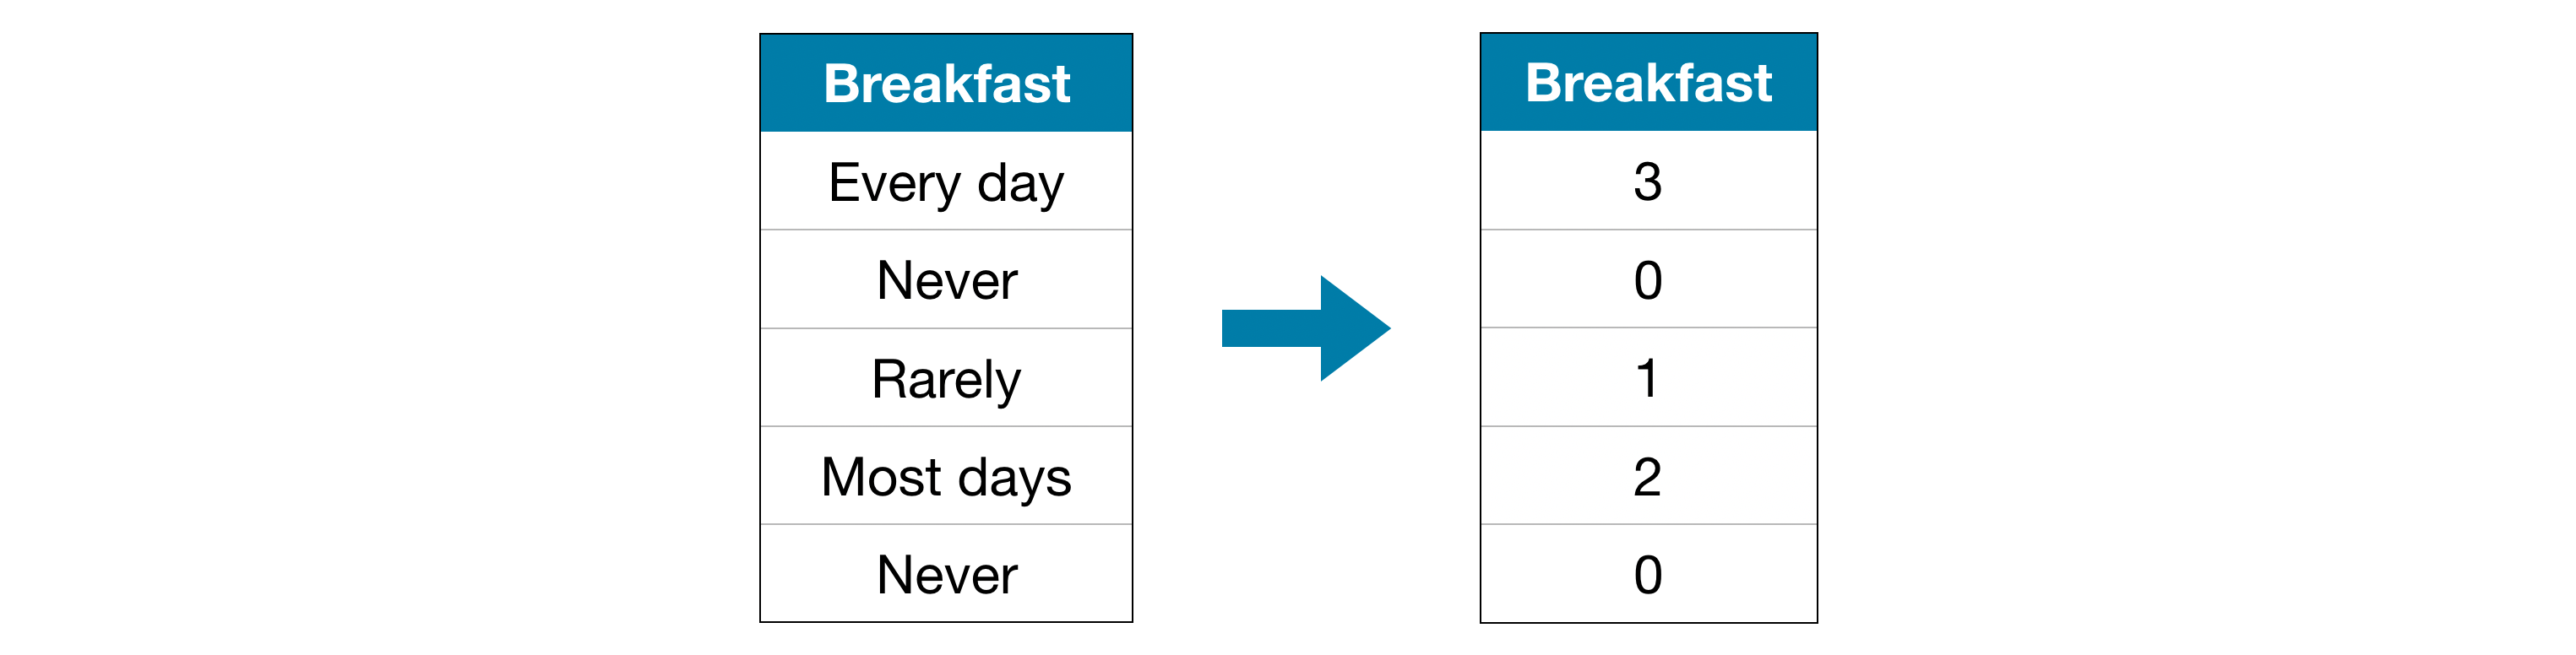

In [150]:
# Importing the OrdinalEncoder class.

from sklearn.preprocessing import OrdinalEncoder

In [151]:
# Making copy of the original dataframes, to avoid any change in original during the process.

label_X_train=X_train_1.copy()
label_X_valid=X_valid_1.copy()

In [152]:
# We declare Ordinal Encoder under a variable.

ordinal_encoder=OrdinalEncoder()

In [153]:
# There can be situations where, maybe in this process of ordinal encoding, there might be some unique values under  a particular object type column of the validating or testing dataset,
# which is not present in the training dataframe of that column. Hence, while fitting and transforming that column in the training dataframe, we will not have any ordinal value for those unique values only present in validating or testing dataframe.
# So, while transforming those training and validating dataframes, it will be showing error. So, to avoid that, there are many processes.
# But the most easy one is to drop those type of columns from all dataframes. So, we find those object type columns which are good, i.e., all unique values are same in different dataframes.
# Here, we do that by going through each object column and seeing if for a particular column in the validating dataset, the set of uniqie values for that column is a subset of the set of unique values present under the same column in the training dataset.
# When we do set(label_X_valid[col]), we bascially get the set of unique values under that olumn for that dataset, because in a particular set same values cannot coexist at the same time, only one version of the value exists.

good_label_cols=[col for col in object_cols if set(label_X_valid[col]).issubset(set(label_X_train[col]))]
good_label_cols

['Type', 'Method', 'Regionname']

In [154]:
# Similarly we find those columns which are bad, i.e., got different unique values from training dataset.
# We find the bad columns just subtracting the universal set of all object type columns, i.e., the object_cols list which is converted into a set and set of all good columns.
# In this dataset there is not bad column, so we we will not drop any column. If some columns would have been present, we would have deleted those columns or droped those columns
# from all the dataframes we are working with and make a new version of each of those dataframes without the bad columns.

bad_label_cols=list(set(object_cols)-set(good_label_cols))
bad_label_cols

[]

In [155]:
# As we can see below the ordinal encoder is used to fit and transform columns from the training data which have object datatype.

ordinal_encoder.fit_transform(X_train_1[object_cols])

array([[2., 1., 5.],
       [0., 2., 6.],
       [0., 1., 6.],
       ...,
       [0., 0., 2.],
       [0., 1., 2.],
       [0., 3., 6.]])

In [156]:
# Same case as above. Here we are just transforming only the object datatype columns from the validating dataframe.

ordinal_encoder.transform(X_valid_1[object_cols])

array([[0., 3., 6.],
       [0., 1., 6.],
       [0., 3., 6.],
       ...,
       [0., 1., 0.],
       [0., 1., 6.],
       [0., 3., 2.]])

In [157]:
# Changing the columns with object datatype with ordianl encoder data in both training and validating dataframes.

label_X_train[object_cols]=ordinal_encoder.fit_transform(X_train_1[object_cols])
label_X_valid[object_cols]=ordinal_encoder.transform(X_valid_1[object_cols])

In [158]:
# Printing the mae result for the second appraoch by using ordinal encoder.

print("MAE from Approach 2 (Ordinal Encoding):")
print(score_dataset(label_X_train,label_X_valid,y_train_full,y_valid_full,100))

MAE from Approach 2 (Ordinal Encoding):
165936.40548390493


#### **One-Hot Encoding**

One-hot encoding creates new columns indicating the presence or absence of each possible value in the original data. So, total number of new columns considering a particular column already given in the dataset will be equivalent to the total number of unique values under that column. 

See, the below picture for better understanding.

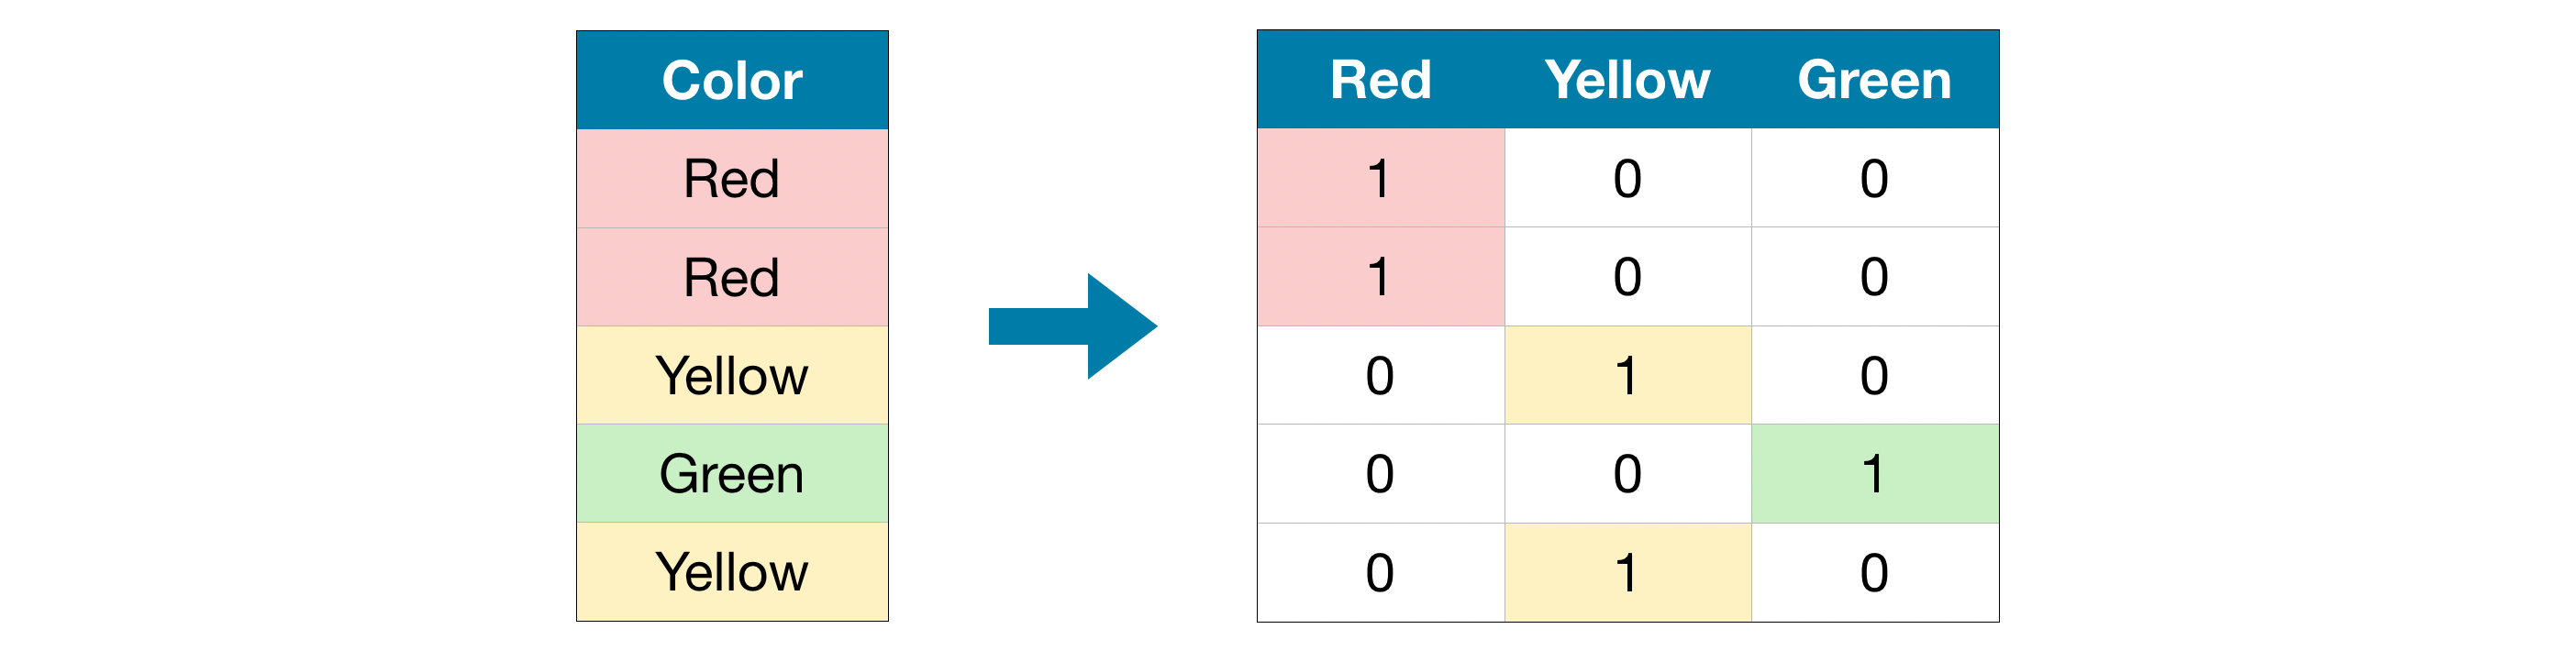

In contrast to ordinal encoding, one-hot encoding does not assume an ordering of the categories. Thus, we can expect this approach to work particularly well if there is no clear ordering in the categorical data (e.g., "Red" is neither more nor less than "Yellow"). We refer to categorical variables without an intrinsic ranking as nominal variables.

One-hot encoding generally does not perform well if the categorical variable takes on a large number of values (i.e., you generally won't use it for variables taking more than 15 different values).

In [159]:
# Impoerting the One Hot Encoder.

from sklearn.preprocessing import OneHotEncoder

In [160]:
# Here, we get the list of number of unique values present in every object type col in the dataframe.
# We make the list using map function.
# Then we zip the object type column name and their respective unique values number to form a dictionary, where object column name is the key and number of unique values under that column is the value. 

object_nunique=list(map(lambda col: X_train_1[col].nunique(),object_cols))
d=dict(zip(object_cols,object_nunique))
d.items()

dict_items([('Type', 3), ('Method', 5), ('Regionname', 8)])

In [161]:
# Here, we sort the above dictionary by getting every pair from the dictionary in a tuple format, using the items() function.
# We do the sorting on the basis of the second element in the tuple.

sorted(d.items(),key=lambda x: x[1])

[('Type', 3), ('Method', 5), ('Regionname', 8)]

In [162]:
# Declaring the OneHotEncoder() function under a variable.
# Here handle_unknown parameter has been used whose value is given 'ignore', which bascially says that to ignore if any unknown categorical feature is encountered while working with a dataframe which is not the training one.
# If in the training dataframe there are say n unique categorical values under a certain column. Then due to one hot encoding, we will be having n different columns, one for each unique value.
# Now, if while transforming another dataframe, the encoder encounters a different value which doesnot fall under those unique categorical values from training dataframe, then, the one hot encoding will not work,
# or will be incorrect, because initally those values where not present. So, if ignore is given then those situations are ignored and all those new unique values will be given 0 and if not then error wil be shown.
# Since, this OneHotEncoder() returns an np array, so there is an option that it might return a sparse matrix instead of an array.

OH_encoder=OneHotEncoder(handle_unknown='ignore',sparse=False)

In [163]:
# Here, the below code returns an np array.
# Only those columns which needed to one hot encoded are passed from the dataframe.
# The training data is used to fit and then transform.

OH_encoder.fit_transform(X_train_1[object_cols])

array([[0., 0., 1., ..., 1., 0., 0.],
       [1., 0., 0., ..., 0., 1., 0.],
       [1., 0., 0., ..., 0., 1., 0.],
       ...,
       [1., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 1., 0.]])

In [164]:
# Same as above, the below code returns an np array and validating data is transformed and only the marked columns are passed.

OH_encoder.transform(X_valid_1[object_cols])

array([[1., 0., 0., ..., 0., 1., 0.],
       [1., 0., 0., ..., 0., 1., 0.],
       [1., 0., 0., ..., 0., 1., 0.],
       ...,
       [1., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 1., 0.],
       [1., 0., 0., ..., 0., 0., 0.]])

In [165]:
# Storing those one hot encoded values from the training data as a dataframe in a varaible OH_cols_train. 

OH_cols_train=pd.DataFrame(OH_encoder.fit_transform(X_train_1[object_cols]))
OH_cols_train

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15
0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
1,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
3,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
4,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10859,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
10860,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
10861,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
10862,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0


In [166]:
# Storing those one hot encoded values from the validating data as a dataframe in a varaible OH_cols_valid. 

OH_cols_valid=pd.DataFrame(OH_encoder.transform(X_valid_1[object_cols]))
OH_cols_valid

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15
0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
3,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
4,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2711,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2712,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2713,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2714,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


In [167]:
# If we run the above code cells, we will get that one hot encoding dataframe will not have index name and columns names.
# Column names are not required as such, but index names are important and essential, because user may give its own personalised index names or values for each row.
# And if we look into the case of ordinal encoder, there one column was replaced by the new one, but here in this method one column is replaced by more than one columns.
# So, just updating the column wont do here. We need to concat it. Hence, in the above method only updating was enough and we didnot have to think about the indexes, but here we have to,
# because we have to concat this columns to the dataframe, for that chaning index to original one is important.
# Hence, copying the index name from the original training dataframe to the training one hot encoding dataframe.

OH_cols_train.index=X_train_1.index
OH_cols_train

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15
12167,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
6524,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
8413,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2919,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
6043,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13123,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
3264,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
9845,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
10799,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0


In [168]:
# Copying the index name from the original validating dataframe to the validating one hot encoding dataframe.

OH_cols_valid.index=X_valid_1.index
OH_cols_valid

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15
8505,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
5523,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
12852,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
4818,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
12812,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2664,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
8513,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
12922,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
10761,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


In [169]:
# Making two dataframes by droping the object type columns from the both training and validating dataframes.

num_X_train=X_train_1.drop(object_cols,axis=1)
num_X_valid=X_valid_1.drop(object_cols,axis=1)

In [170]:
# In the above cell, when we drop the object data type columns, we are only left with numerical ones, hence,
# in the above process the above vairables have num in them to denote they contain only numerical data type columns.
# So, finally for the training we try to make a new dataframe by concating the numerical columns from the original training dataframe and
# new one hot encoded training dataframe.

OH_X_train=pd.concat([num_X_train,OH_cols_train],axis=1)
OH_X_train

,Rooms,Distance,Postcode,Bedroom2,Bathroom,Landsize,Lattitude,Longtitude,Propertycount,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15
12167,1,5.0,3182.0,1.0,1.0,0.0,-37.85984,144.98670,13240.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
6524,2,8.0,3016.0,2.0,2.0,193.0,-37.85800,144.90050,6380.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
8413,3,12.6,3020.0,3.0,1.0,555.0,-37.79880,144.82200,3755.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2919,3,13.0,3046.0,3.0,1.0,265.0,-37.70830,144.91580,8870.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
6043,3,13.3,3020.0,3.0,1.0,673.0,-37.76230,144.82720,4217.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13123,3,5.2,3056.0,3.0,1.0,212.0,-37.77695,144.95785,11918.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
3264,3,10.5,3081.0,3.0,1.0,748.0,-37.74160,145.04810,2947.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
9845,4,6.7,3058.0,4.0,2.0,441.0,-37.73572,144.97256,11204.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
10799,3,12.0,3073.0,3.0,1.0,606.0,-37.72057,145.02615,21650.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0


In [171]:
# Similarly, as above here we make our new validating dataframe by concating the numerical columns from the original validating dataframe and
# one hot encoded validating dataframe.

OH_X_valid=pd.concat([num_X_valid,OH_cols_valid],axis=1)
OH_X_valid

,Rooms,Distance,Postcode,Bedroom2,Bathroom,Landsize,Lattitude,Longtitude,Propertycount,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15
8505,4,8.0,3016.0,4.0,2.0,450.0,-37.86100,144.89850,6380.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
5523,2,6.6,3011.0,2.0,1.0,172.0,-37.81000,144.88960,2417.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
12852,3,10.5,3020.0,3.0,1.0,581.0,-37.76740,144.82421,4217.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
4818,3,4.5,3181.0,2.0,2.0,128.0,-37.85260,145.00710,7717.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
12812,3,8.5,3044.0,3.0,2.0,480.0,-37.72523,144.94567,7485.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2664,2,6.4,3011.0,2.0,1.0,47.0,-37.80140,144.89590,7570.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
8513,4,8.0,3016.0,4.0,2.0,551.0,-37.85790,144.87860,6380.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
12922,3,10.8,3105.0,3.0,1.0,757.0,-37.78094,145.10131,4480.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
10761,4,6.2,3039.0,4.0,1.0,478.0,-37.76421,144.90571,6232.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


In [172]:
# At the end we print the mae value for this one hot encoded approach.

print("MAE from Approach 3 (One-Hot Encoding):") 
print(score_dataset(OH_X_train,OH_X_valid,y_train_full,y_valid_full,100))

MAE from Approach 3 (One-Hot Encoding):
166089.4893009678




---



# **Pipelines**

## **Introduction**

Pipelines is an easy way to keep data preprocessing and modeling code organised. It bundles the preprocessing and modeling steps so we can use the whole bundle as if it were a single step.

This helps in:


1.   **Cleaner Code**
2.   **Fewer Bugs**
3.   **Easier to Productionaize**
4.   **More Options for Model Validation**



### **Example**

In [173]:
# Reading in csv in data_2 variable for implementing the Pipeline concept.

data_2=pd.read_csv("/content/drive/MyDrive/Colab Notebooks/Intermediate_Machine_Learning/melb_data.csv")

In [174]:
# The prediction target and features are set and the daaset is splitted for training and validating data.

y_2=data_2.Price
X_2=data_2.drop(['Price'],axis=1)

X_train_full_2,X_valid_full_2,y_train_2,y_valid_2=train_test_split(X_2,y_2,train_size=0.8,test_size=0.2,random_state=0)

In [175]:
# The categorical_cols_2 stores those columns who are of object datatype and low in cardinaity, i.e. the unique values under that column is les than 10.

categorical_cols_2=[cname for cname in X_train_full_2.columns if X_train_full_2[cname].nunique()<10 and X_train_full_2[cname].dtype=='object']

In [176]:
# The numerical_cols_2 store those columns who are of numerical, i.e., of int and float type only.

numerical_cols_2=[cname for cname in X_train_full_2.columns if X_train_full_2[cname].dtype in['int64','float64']]

In [177]:
# Building the datasets on which the actual work will be done using only the columns under categorical_cols_2 and numerical_cols_2.

my_cols_2=categorical_cols_2+numerical_cols_2
X_train_2=X_train_full_2[my_cols_2].copy()
X_valid_2=X_valid_full_2[my_cols_2].copy()

In [178]:
# Printing the training dataset.

X_train_2.head()

,Type,Method,Regionname,Rooms,Distance,Postcode,Bedroom2,Bathroom,Car,Landsize,BuildingArea,YearBuilt,Lattitude,Longtitude,Propertycount
12167,u,S,Southern Metropolitan,1,5.0,3182.0,1.0,1.0,1.0,0.0,NaN,1940.0,-37.85984,144.9867,13240.0
6524,h,SA,Western Metropolitan,2,8.0,3016.0,2.0,2.0,1.0,193.0,NaN,NaN,-37.85800,144.9005,6380.0
8413,h,S,Western Metropolitan,3,12.6,3020.0,3.0,1.0,1.0,555.0,NaN,NaN,-37.79880,144.8220,3755.0
2919,u,SP,Northern Metropolitan,3,13.0,3046.0,3.0,1.0,1.0,265.0,NaN,1995.0,-37.70830,144.9158,8870.0
6043,h,S,Western Metropolitan,3,13.3,3020.0,3.0,1.0,2.0,673.0,673.0,1970.0,-37.76230,144.8272,4217.0


In [179]:
# Printing the validating dataset.

X_valid_2.head()

,Type,Method,Regionname,Rooms,Distance,Postcode,Bedroom2,Bathroom,Car,Landsize,BuildingArea,YearBuilt,Lattitude,Longtitude,Propertycount
8505,h,SP,Western Metropolitan,4,8.0,3016.0,4.0,2.0,2.0,450.0,190.0,1910.0,-37.86100,144.89850,6380.0
5523,h,S,Western Metropolitan,2,6.6,3011.0,2.0,1.0,0.0,172.0,81.0,1900.0,-37.81000,144.88960,2417.0
12852,h,SP,Western Metropolitan,3,10.5,3020.0,3.0,1.0,1.0,581.0,NaN,NaN,-37.76740,144.82421,4217.0
4818,t,PI,Southern Metropolitan,3,4.5,3181.0,2.0,2.0,1.0,128.0,134.0,2000.0,-37.85260,145.00710,7717.0
12812,h,S,Northern Metropolitan,3,8.5,3044.0,3.0,2.0,2.0,480.0,NaN,NaN,-37.72523,144.94567,7485.0


#### **Step 1: Define Preprocessing Steps**



*   Imputes missing values in **numerical** data
*   Imputes missing values and applies a one-hot encoding to **categorical** data.



In [180]:
# ColumnTansformer, Pipeline, SimpleImputer, OneHotEncoder, RandomForestRegressor and mean_absolte_error classes are imported from their respective packages.

from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error

In [181]:
# Declaring a simpleimputer object with strategy constant.
# The strategy is constant, that means the missing values will be replaced by the value given in fill_value parameter.
# If no value is given for fill_value, then for numeric the default is 0, and for object it is given the value of 'missing_value'.

numerical_transformer=SimpleImputer(strategy='constant')

In [182]:
# Now, we create a pipeline for the categorical datatypes.
# This pipeline tells us step by step what are the things we need to do with categorical datatypes columns.
# First step is to impute the missing values under every column with the most freuquent value of that particular column.
# Second step we do one hot encoding of the categorical values under every column.
# In pipeline, we pass the steps in the steps attribute. 
# The steps attribute accepst lists with tuples, where each tuple describe each step.
# In each tuple the first is the name of the step and the second is the defined step itslef.

categorical_transformer=Pipeline(steps=[('imputer', SimpleImputer(strategy='most_frequent')),('onehot', OneHotEncoder(handle_unknown='ignore'))])

In [183]:
# Transformers are used to transform a column.
# Column transformer is used to apply different types of transformers to different columns seperately and the features generated by each transformer is then concatenated to form a single feature space.
# Here we are concerned with two types of cols one is numberical and the other is categorical.
# So, the different transoformers that we need are passed in the transformer attributs as a list of tuples.
# In each tuple, the first is the name of the transformer for this columntransformer, then the defined transformer and at the end the columns list on which the transformer need to act on.

preprocessor=ColumnTransformer(transformers=[('num',numerical_transformer,numerical_cols_2),('cat',categorical_transformer,categorical_cols_2)])

#### **Step 2: Define the Model**

In [184]:
# Here we define our random forest regressor model.

model=RandomForestRegressor(n_estimators=100,random_state=0)

In [185]:
# Here we define a pipeline over all the preprocessing and modelling step.
# The first step is obviously the preprocessing step.
# The next is the modeling step.

my_pipeline=Pipeline(steps=[('preprocessor',preprocessor),('model',model)])

#### **Step 3: Create and Evaluate the Pipeline**



*   With the piepline we preprocess the training data and fit the model in single line of code.
*   With the pipeline we supply the unprocessed features in X_Valid to the predict() command and the pipeline automatically preprocesses the features before generating predictions.



In [186]:
# Here, we fit our model, using the pipeline, we just defined in the above code segment
# Then at the end we predict using the model.

my_pipeline.fit(X_train_2,y_train_2)
preds=my_pipeline.predict(X_valid_2)

In [187]:
# Here, we print the score of the model.

score=mean_absolute_error(y_valid_2,preds)
print('MAE:', score)

MAE: 160679.18917034855




---



#**Cross-Validation**

## **Introduction**

The process in which we were till now finding the validation scores have some drawbacks.

So, for example, if we have 1000 rows of dataset. From it we take around 20% or 200 rows as validation set. So, there is a random chance in determining the validation scores, because, a model might do well on one set of 200 rows or may be inaccurate on a different 200 rows.

In general, the larger the validation set the less randomness or noise there will be in the meaasure of model quality and more reliable it will be. But, unfortunately, that cannot be done because of underfitting issues, hence we go for cross-validation method.

## **What is cross-validation?**

In cross-validation, we run our modeling process on different subsets of the data to get multiple measures of model quality.

For example, we can divide our data into 5 pieces, each containing 20% of the full dataset. 

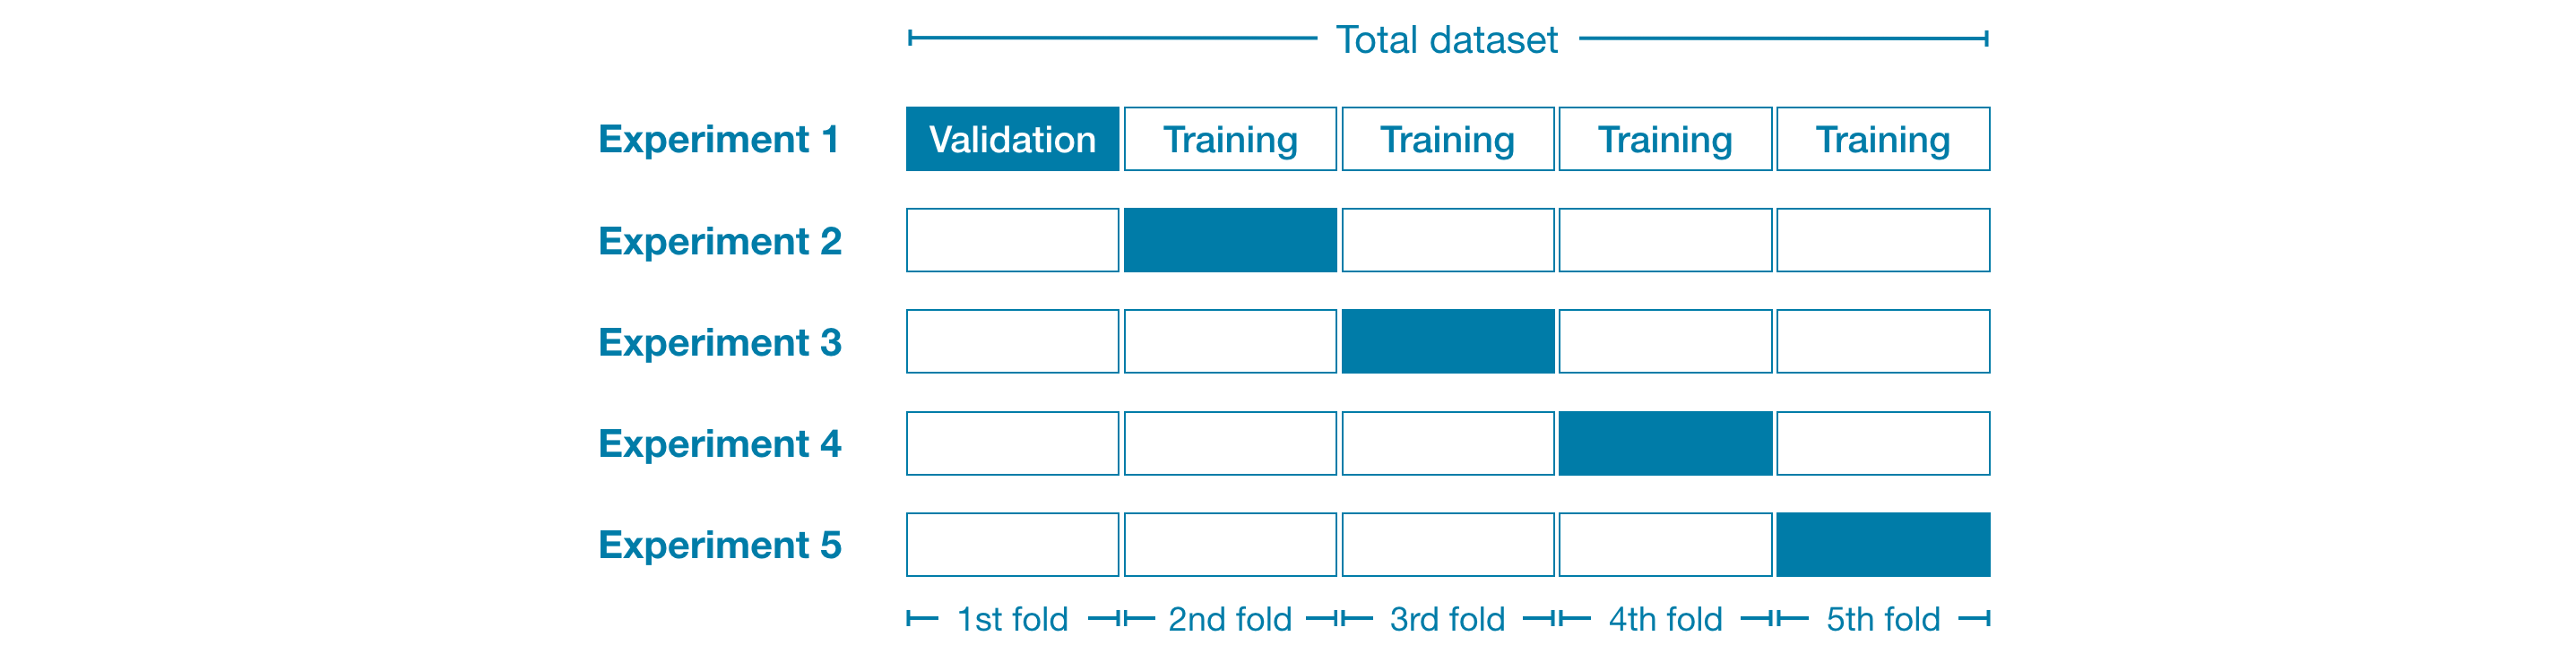

*   In **Experiment 1** we use the first fold or piece as our validation set and the remaining as our training data.
*   In **Experiment 2** we use the second fold or piece as our validation set and the remaining as our training data.
*   And so on. We reapeat until all of the data has been used as the validation set at some point.

We end up getting multiple scores, and generally we took the average of them to work with.



## **When should we use this approach?**



*   For smaller datasets, when extra computational burden is not really a big deal.   
*   For larger datasets a single validation set is enough, becuase we may have enough data for the training to create an accurate model.



In [188]:
# This are the columns that will be only used as features to showcase cross validation.

cols_to_use = ['Rooms','Distance','Landsize','BuildingArea','YearBuilt']

In [189]:
# Importing the cross_val_score function.

from sklearn.model_selection import cross_val_score

In [190]:
# Using the cross_val_function to find out and store different scores in the variable score.
# Inside the function we pass the pipeline, the X and y part that will be used to train the model.
# Then cv is also set, which decides the number of folds in the dataset to be created.
# At the end the scoring parameter is passed which tells what type of scoring method or technique to be used to calculate the score.
# Here, we have used negative mean absolute error, hence at the time of calculating the score we multiply the result by -1.
# The get_score function returns mean of the scores for a particular value of n_estimator in the random forest regressor.


def get_score(n_estimators):
  pipeline=Pipeline(steps=[('preprocessor',SimpleImputer()),('model',RandomForestRegressor(n_estimators=n_estimators,random_state=0))])
  scores=-1*cross_val_score(pipeline,X[cols_to_use],y,cv=5,scoring='neg_mean_absolute_error')
  return scores.mean()

In [191]:
# Here we store the results for different value of n_estimator in dictionary where the value of n_estimator is the key and the value is the average returned score.

results = {key:get_score(key) for key in [50,100,150,200,250,300,350,400]} 

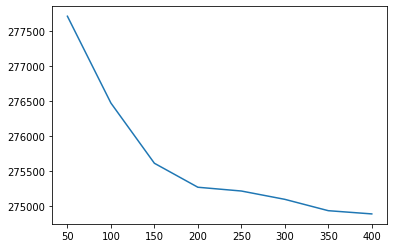

In [192]:
# Here we plot a graph where X axis represents the n_estimator value and Y axis represents the average score.
# Higher the value of n_estimator lower is the score, i.e., better the model in this particular case will work.

import matplotlib.pyplot as plt
%matplotlib inline

plt.plot(list(results.keys()), list(results.values()))
plt.show()



---



#**XGBoost**


The below method of building and optimizing models are done with gradient boosting.

## **Introduction**

In all the above cells we have used an ensemble method known as **Random Forests**. But now, the below cells will teach how to use **Gradient Boosting**.

Ensemble methods are those which combine predictions of several methods to make a prediction.

## **Gradient Boosting**

It begins by initializing the ensemble with a single model, whose predictions can be pretty naive. Although, even if they are wildly inaccurate, subsequent additions to the ensemble will adrress those errors.

Then we start the cycle:


*   First we make predictions by adding predictions from all models form the current ensemble.
*   Then these precdictions are used to calculate loss function.
*   Then we use the loss function to fit a new model that will be added into the ensemble.
*   We add the new model into the ensemble.
*   Repeat. 

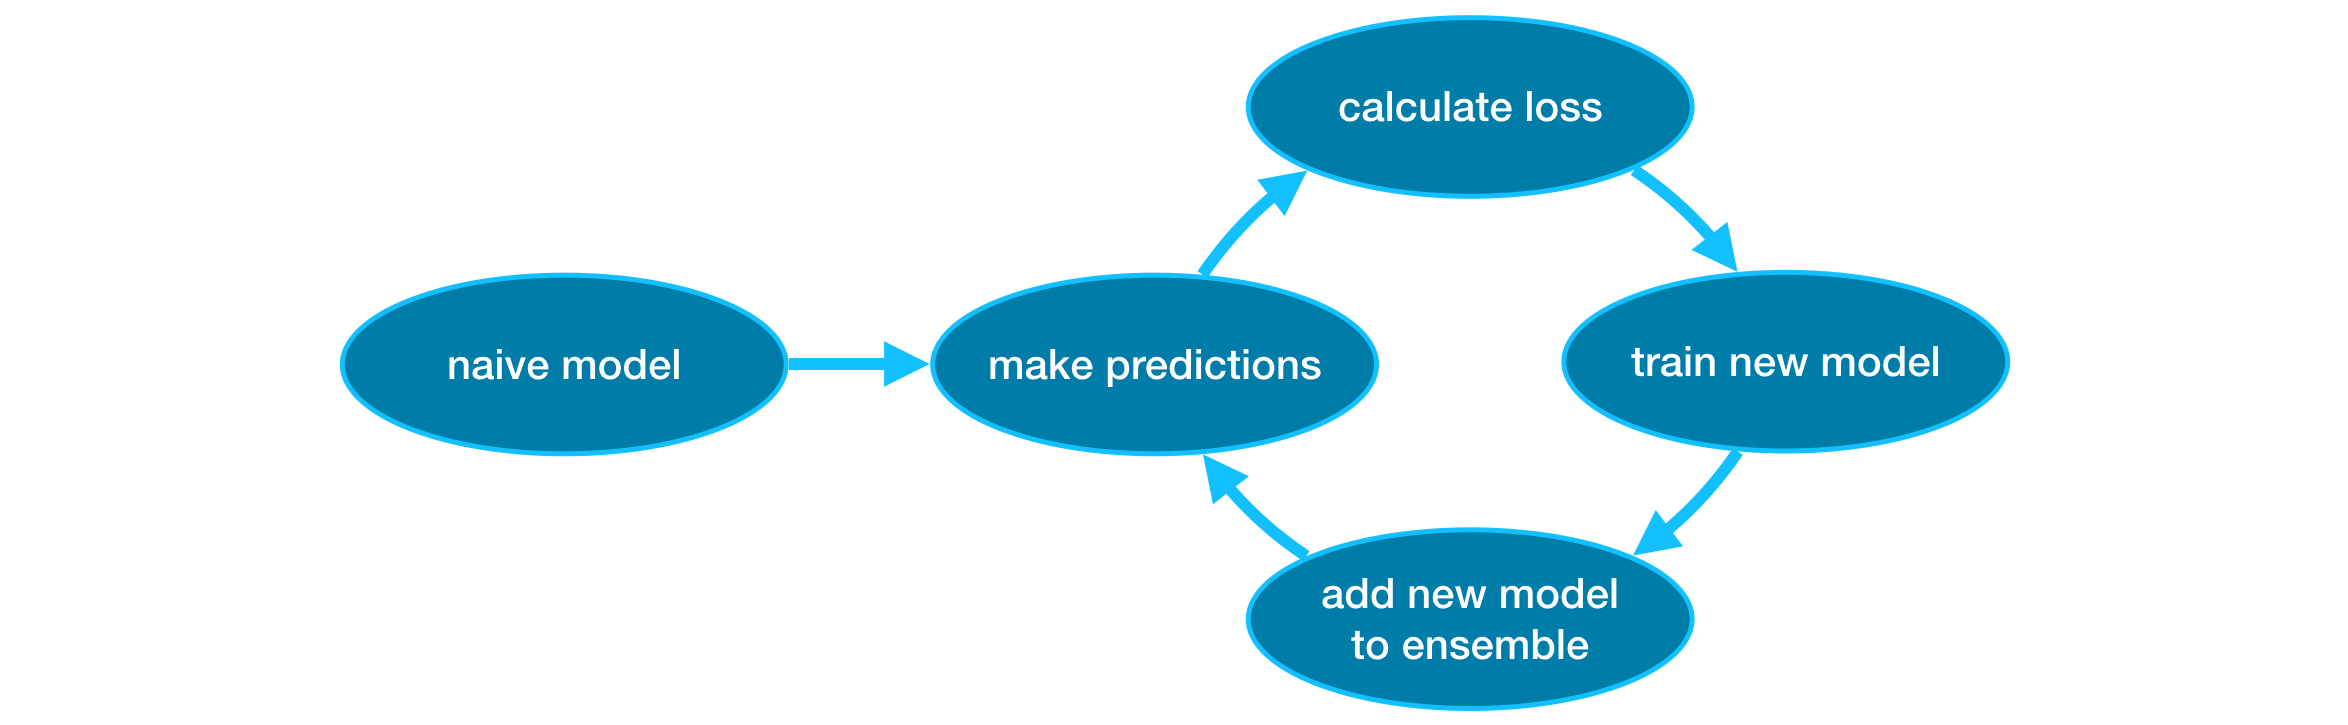

### **Example**

In [193]:
# Readig in data.

X_3=pd.read_csv("/content/drive/MyDrive/Colab Notebooks/Intermediate_Machine_Learning/melb_data.csv")

In [194]:
# Manipulating data and making datasets for both trainig and validating purpose.

# Dropping NA rows from Price column of X.
X_3.dropna(axis=0,subset=['Price'],inplace=True)

# Making the target variable by iuncluding the Price column.
y_3=X_3.Price          

# Making the feature valraible by removing the target column from dataset.
X_3.drop(['Price'],axis=1,inplace=True)

# Splitting data into training and validating datasets.
X_train_full_3,X_valid_full_3,y_train_3,y_valid_3=train_test_split(X_3,y_3,train_size=0.8,test_size=0.2,random_state=0)

# Finding the low_cardinality_cols, i.e. those columns which got less than 10 unique values under it and those cols must be of object datatype.
low_cardinality_cols=[cname for cname in X_train_full_3.columns if X_train_full_3[cname].nunique()<10 and X_train_full_3[cname].dtype=="object"]

# Finding out the columns of numeric datatype.
numeric_cols=[cname for cname in X_train_full_3.columns if X_train_full_3[cname].dtype in ['int64','float64']]

# Finally making the training and validating datasets by including just those columns which are present in low_cardinality_cols and numeric_cols.
my_cols=low_cardinality_cols+numeric_cols
X_train_3=X_train_full_3[my_cols].copy()
X_valid_3=X_valid_full_3[my_cols].copy()

X_train_3=pd.get_dummies(X_train_3)
X_valid_3=pd.get_dummies(X_valid_3)
X_train, X_valid = X_train.align(X_valid, join='left', axis=1)

In [195]:
# Importing the XGBRegressor class from xgboost package.
# Also importing the mean_absolute_error function.

from xgboost import XGBRegressor
from sklearn.metrics import mean_absolute_error

In [196]:
# Making the first and simple model using XGBRegressor.
# Fitting and training the model using the training dataset.

my_model_3_a=XGBRegressor()
my_model_3_a.fit(X_train_3,y_train_3)

[17:09:40] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0,
             importance_type='gain', learning_rate=0.1, max_delta_step=0,
             max_depth=3, min_child_weight=1, missing=None, n_estimators=100,
             n_jobs=1, nthread=None, objective='reg:linear', random_state=0,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
             silent=None, subsample=1, verbosity=1)

In [197]:
# Predicting values of the simple model.

predictions=my_model_3_a.predict(X_valid_3)
print("Mean Absolute Error: "+str(mean_absolute_error(predictions,y_valid_3)))

Mean Absolute Error: 183467.41318805228


## **Parameter Tuning** 

#### **1) n_estimators**

The n_estimator value specifies how many times to go through cycle. Therefore, it is equal to the number of models that we include in the ensemble.

*   Too low value may cause underfitting.
*   Too large value may cause overfitting.

Typical value is from 100-100, thogh this depends on the learning rate discussed below.

In [198]:
# Here, we use a parameter known as n_estimators, whose value is given 1000. Default value of the parameter is 100.

my_model_3_b=XGBRegressor(n_estimartors=100)
my_model_3_b.fit(X_train_3,y_train_3)

[17:09:41] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0,
             importance_type='gain', learning_rate=0.1, max_delta_step=0,
             max_depth=3, min_child_weight=1, missing=None, n_estimartors=100,
             n_estimators=100, n_jobs=1, nthread=None, objective='reg:linear',
             random_state=0, reg_alpha=0, reg_lambda=1, scale_pos_weight=1,
             seed=None, silent=None, subsample=1, verbosity=1)

In [199]:
# Predicting the score of the new model, which used n_estimator as a parameter.

predictions=my_model_3_b.predict(X_valid_3)
print("Mean Absolute Error: "+str(mean_absolute_error(predictions,y_valid_3)))

Mean Absolute Error: 183467.41318805228


#### **2) early_stopping_rounds**

This parameter early_stopping_rounds offers a way to automatically find the ideal value of n_estimators.

It's smart to set a high value for n_estimators and then use early_stopping_rounds to find the optimal time to stop iterating.

If we give a certain value of x to it, then it causes to stop the model from iterating any further, if the validation scores stops improving for x rounds straight.

Since, there is a random chance that causes a single round where the validation scores do not improve we need to specify the number such that it does not happen.

When using this parameter, we need to also pass another parameter known as eval_set, which will contain some data for calculating the validation scores.

If later there is a need to fit a model with all of the data, set n_estimators to whatever value we got to be optimal when run with early_stopping.

In [200]:
# Here we have used another parameter in the fitting function which is early_stopping_rounds. Its value has been given 5.
# As we have included it we include another parameter knwon as eval_set, where a list of evaluation datasets have been passed in form of a tuple containing both the X and y datasets.
# Here, we have passed the validating dataset.
# The verbose parameter is also used whose value is False, so logging output is not printed in the output.

my_model_3_c=XGBRegressor(n_estimartors=1000)
my_model_3_c.fit(X_train_3,y_train_3,early_stopping_rounds=5,eval_set=[(X_valid_3,y_valid_3)],verbose=False)

[17:09:43] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0,
             importance_type='gain', learning_rate=0.1, max_delta_step=0,
             max_depth=3, min_child_weight=1, missing=None, n_estimartors=1000,
             n_estimators=100, n_jobs=1, nthread=None, objective='reg:linear',
             random_state=0, reg_alpha=0, reg_lambda=1, scale_pos_weight=1,
             seed=None, silent=None, subsample=1, verbosity=1)

In [201]:
# Predicting the new model with early_stopping_rounds parameter,

predictions=my_model_3_c.predict(X_valid_3)
print("Mean Absolute Error: "+str(mean_absolute_error(predictions,y_valid_3)))

Mean Absolute Error: 183467.41318805228


#### **3) learning_rate**

A problem with gradient boosted model is that they are quick to learn and overfit training data.

One effective way to slow down learning in the gradient boosting model is to use a learning rate, also called shrinkage (or eta in XGBoost documentation).

So, instead of getting the predictions by simply adding the predictions from each component model, we can multiply the predictions from each model by a small number, i.e., the value passed to learning_rate before adding them. This will ensure that each tree we add to the ensemble help us less.

Therefore, we will be able to set a higher value of n_estimator without the fear of overfitting.

In [202]:
# Here, we have used the learning_rate parameter, whose default value is 0.1. The value given here is 0.05.

my_model_3_d=XGBRegressor(n_estimartors=1000,learning_rate=0.05)
my_model_3_d.fit(X_train_3,y_train_3,early_stopping_rounds=5,eval_set=[(X_valid_3,y_valid_3)],verbose=False)

[17:09:44] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0,
             importance_type='gain', learning_rate=0.05, max_delta_step=0,
             max_depth=3, min_child_weight=1, missing=None, n_estimartors=1000,
             n_estimators=100, n_jobs=1, nthread=None, objective='reg:linear',
             random_state=0, reg_alpha=0, reg_lambda=1, scale_pos_weight=1,
             seed=None, silent=None, subsample=1, verbosity=1)

In [203]:
# Predicting the score of the new model using learning_rate

predictions=my_model_3_d.predict(X_valid_3)
print("Mean Absolute Error: "+str(mean_absolute_error(predictions,y_valid_3)))

Mean Absolute Error: 198333.56057276326


#### **4) n_jobs**


The parameter n_jobs is an integer, specifying the maximum number of concurrently running workers.

On larger datasets where runtime is a consideration, we can use parallelism to build our models faster. It's common to set the parameter n_jobs equal to the number of cores on your machine. On smaller datasets, this won't help.

In [204]:
# Finally, here we have shown the use of n_jobs parameter. 
# It has been given a value of 4, which is equivalent to the number of cores on the machine, I want to allot.

my_model_3_e=XGBRegressor(n_estimartors=1000,learning_rate=0.05,n_jobs=4)
my_model_3_e.fit(X_train_3,y_train_3,early_stopping_rounds=5,eval_set=[(X_valid_3,y_valid_3)],verbose=False)

[17:09:45] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0,
             importance_type='gain', learning_rate=0.05, max_delta_step=0,
             max_depth=3, min_child_weight=1, missing=None, n_estimartors=1000,
             n_estimators=100, n_jobs=4, nthread=None, objective='reg:linear',
             random_state=0, reg_alpha=0, reg_lambda=1, scale_pos_weight=1,
             seed=None, silent=None, subsample=1, verbosity=1)

In [205]:
# Prediciting the value of the new model using the n_jobs parameter, which actually trains the model a bit faster.
# Although in case of larger datasets the time difference would have been a bit more visible.

predictions=my_model_3_e.predict(X_valid_3)
print("Mean Absolute Error: "+str(mean_absolute_error(predictions,y_valid_3)))

Mean Absolute Error: 198333.56057276326




---



# **Data Leakage**

###There are mainly two types of data leakge

1.   **Target Leakage**
2.   **Train-Test Contamination**





## **Target Leakage**

Target leakage occurs when in the training and validating data we include data or fields which will not be available to us during prediction, i.e., while testing our model in real world. This results in high validation scores, but poor perfromance in real world. It is important to think about target leakage in terms of the timing or chronological order that data becomes available, not merely whether a features helps to make good predictions.

To prevent this type of data leakage, any variable updated (or created) after the target value is realized should be excluded.

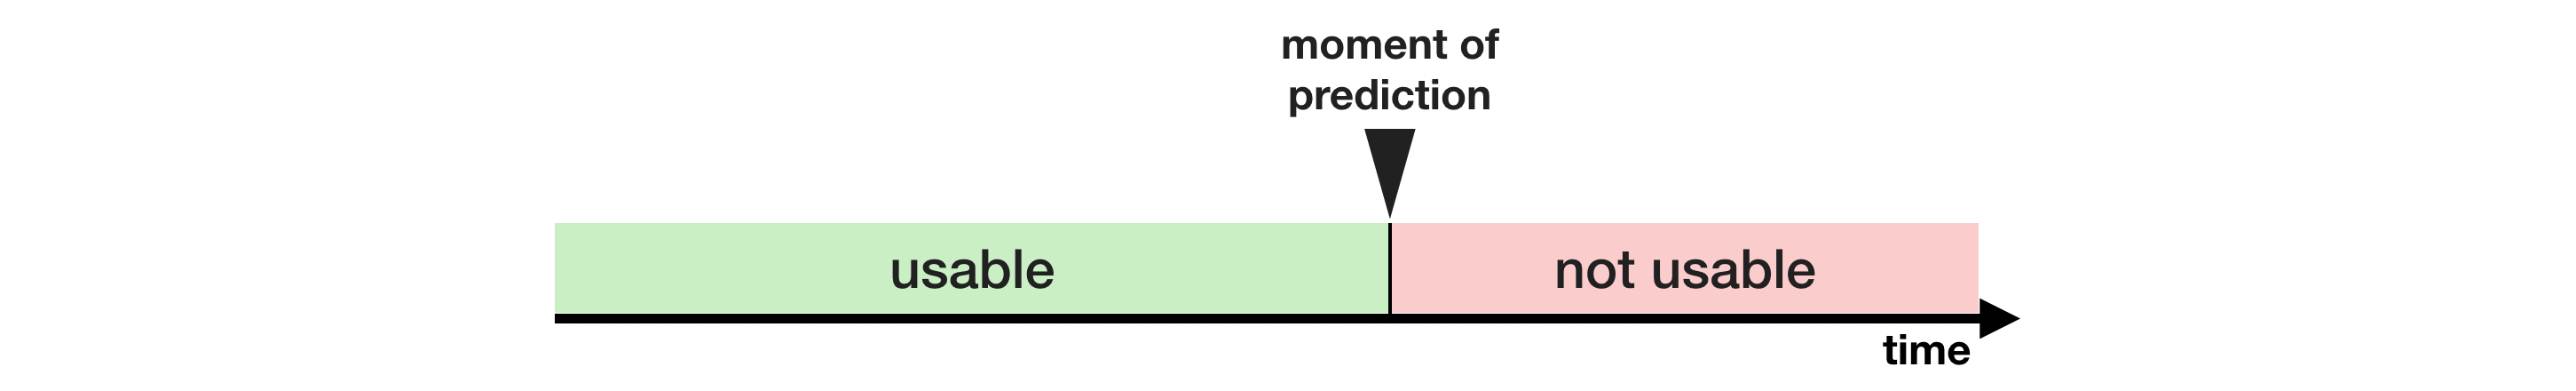

### **Example**

This example shows one way of target leakage detection and its removal.

The dataset used is about credit card applications. We will be using information about the application in the dataframe X and will be predicting which applications were accepted in series y.

Summary of the full dataset:


*  **card**: 1 if credit card application accepted, 0 if not
*  **reports**: Number of major derogatory reports
*  **age**: Age n years plus twelfths of a year
*  **income**: Yearly income (divided by 10,000)
*  **share**: Ratio of monthly credit card expenditure to yearly income
*  **expenditure**: Average monthly credit card expenditure
*  **owner**: 1 if owns home, 0 if rents
*  **selfempl**: 1 if self-employed, 0 if not
*  **dependents**: 1 + number of dependents
*  **months**: Months living at current address
*  **majorcards**: Number of major credit cards held
*  **active**: Number of active credit accounts





In [206]:
# Including the new credit card dataset to give a target leakage example and how to avoid it.

data_4=pd.read_csv("/content/drive/MyDrive/Colab Notebooks/Intermediate_Machine_Learning/AER_credit_card_data.csv",true_values=['yes'],false_values=['no'])

In [207]:
# Importing the RandomForestClassifier class from sklearn.ensemble and make_pipeline class from sklearn.pipeline.

from sklearn.ensemble import RandomForestClassifier
from sklearn.pipeline import make_pipeline

In [208]:
# The target variable is whether somebody got the credit or not. If 1, then yes, otherwise, 0 for no.
# All the other columns except the card column is in the feature list.

y_4=data_4.card
X_4=data_4.drop(['card'],axis=1)
print("Number of rows in the dataset:",X_4.shape[0])
X_4.head()

Number of rows in the dataset: 1319


,reports,age,income,share,expenditure,owner,selfemp,dependents,months,majorcards,active
0,0,37.66667,4.5200,0.033270,124.983300,True,False,3,54,1,12
1,0,33.25000,2.4200,0.005217,9.854167,False,False,3,34,1,13
2,0,33.66667,4.5000,0.004156,15.000000,True,False,4,58,1,5
3,0,30.50000,2.5400,0.065214,137.869200,False,False,0,25,1,7
4,0,32.16667,9.7867,0.067051,546.503300,True,False,2,64,1,5


In [209]:
# Creating a random forest classifier and cross validating the scores.
# Here, we have used accuracy as the score calculating methodology.

my_pipeline_4=make_pipeline(RandomForestClassifier(n_estimators=100))
cv_scores=cross_val_score(my_pipeline_4,X_4,y_4,cv=5,scoring='accuracy')

# The accuracy value of this model is pretty high, which maybe caused due to data leakage.
# Hence, this model may give great results in the training and validating datasets, but will do miserable in the real world with new data.

print("Cross-validation accuracy: %f" % cv_scores.mean())

Cross-validation accuracy: 0.979534


### **Explanation:**

Here in the below cell, we, find out two things.

The first value is the mean of all those people who did not received the card and still had no expenditures.It came to be 1, i.e. all those people who did not got the card had no expenditure.

The second value represents the mean of all those people who did got the card but still had no expenditure.It came to be 0.02, i.e., there are 2 people out of 100 who got the card and had no expenditures.

This completely disproves the theory, that, if somebody did not got any expenditure means that person's application was not accepted, because there are some people who may have got the card but still haven't used it and thus had 0 expenditure as seen from the dataset itself.

So, to include the expenditure column in the training or validating dataset, will lead to target leakage, because the values under that column has a chance to get changed after determinig
whether that person got the card or not.

Hence, we need to remove that column from the datasets to remove target leakage.

In [210]:
expenditures_cardholders=X_4.expenditure[y_4]
expenditures_noncardholders=X_4.expenditure[~y_4]

print('Fraction of those who did not receive a card and had no expenditures: %.2f' %((expenditures_noncardholders == 0).mean()))
print('Fraction of those who received a card and had no expenditures: %.2f' %(( expenditures_cardholders == 0).mean()))

Fraction of those who did not receive a card and had no expenditures: 1.00
Fraction of those who received a card and had no expenditures: 0.02


In [211]:
# There maybe many more columns which may cause target leakage and hence, they are also excluded from the datasets.

potential_leaks=['expenditure', 'share', 'active', 'majorcards']
X2=X_4.drop(potential_leaks, axis=1)

# Evaluating the model after columns which may cause target leakage have been dropped
cv_scores=cross_val_score(my_pipeline_4,X2,y_4,cv=5,scoring='accuracy')

print("Cross-val accuracy: %f" % cv_scores.mean())

Cross-val accuracy: 0.833953


## **Train-Test Contamination**

This type of leak occurs when we do not carefully distinguish between training data from validation data.
Validation is meant to be a measure of how model works on data that it has not considered before. This can be corrupted in subtle ways if validation data affects the preprocessing behavior. 

If we do preprocessing and feature engineering on data before train and validation split, then, there is a possibility of sharing data between train and validation datasets during the preprocessing steps. 

This will result in good validation scores but the model will fail in real world.